# Convolutional Neural Network (CNN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint


# Load the Data

In [2]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

# Prepare the data

## 1. Reshape the image to cover the pixels size and also the channels

In [3]:
x_train = x_train.reshape( -1 , 28, 28, 1)
x_test = x_test.reshape( -1 , 28, 28, 1)


## 2. Scale the inputs from values 0-255 ---> 0-1

In [4]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

## 3. Prepare the labels -> One Hot encoding


In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


# Create the model

In [6]:
model = Sequential() 


# Add the Convolutional Part
#~~~~~~~~~~~~~~~~~~~~~
# Conv1
model.add( Conv2D(32, kernel_size =(3,3) , strides =(1,1) , activation= "relu", padding = "same",  input_shape = (28,28,1) )  )
model.add( MaxPooling2D(pool_size=(2,2), strides = (2,2) ))

# Conv2
model.add( Conv2D(64 , kernel_size =(3,3) , strides =(1,1) ,padding = "same", activation= "relu" )  )
model.add( MaxPooling2D(pool_size=(2,2), strides = (2,2) ))

model.add(Flatten()) # input layer for NN

# Add the NN Part
#~~~~~~~~~~~~~~~~~~~~~
model.add(Dense(128, activation= "relu")) # Hidden layer with 128

model.add(Dropout(0.2) ) # Drop out Layer

model.add(Dense(10, activation= "softmax")) # Output layer



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

# Callbacks

In [8]:
my_callback_list = [
    EarlyStopping(patience=5 ,  min_delta=0.0001),
    CSVLogger("./training_cnn.log"),
    ModelCheckpoint(filepath="./models/cnn_{epoch:02d}_{val_loss:.2f}.keras")    
    #ModelCheckpoint(filepath="./models/cnn_{epoch:02d}_{val_loss:.2f}.h5")     # old
]

# Train the model

In [9]:
LEARNING_RATE = 0.001
EPOCHS = 3

# Compile/configure the model
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE) , loss = "categorical_crossentropy", metrics= ["accuracy"]   )

# Train the model
history = model.fit(x_train, y_train, batch_size = 128,  epochs= EPOCHS, validation_data=(x_test, y_test), callbacks= my_callback_list)


Epoch 1/3


469/469 [==============================] - 19s 37ms/step - loss: 0.2403 - accuracy: 0.9280 - val_loss: 0.0701 - val_accuracy: 0.9775
Epoch 2/3
  3/469 [..............................] - ETA: 15s - loss: 0.0959 - accuracy: 0.9714

c:\Python\Python3116\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/469 [==============================] - 17s 35ms/step - loss: 0.0690 - accuracy: 0.9794 - val_loss: 0.0452 - val_accuracy: 0.9855
Epoch 3/3
469/469 [==============================] - 18s 38ms/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0326 - val_accuracy: 0.9906


# Visualize the results

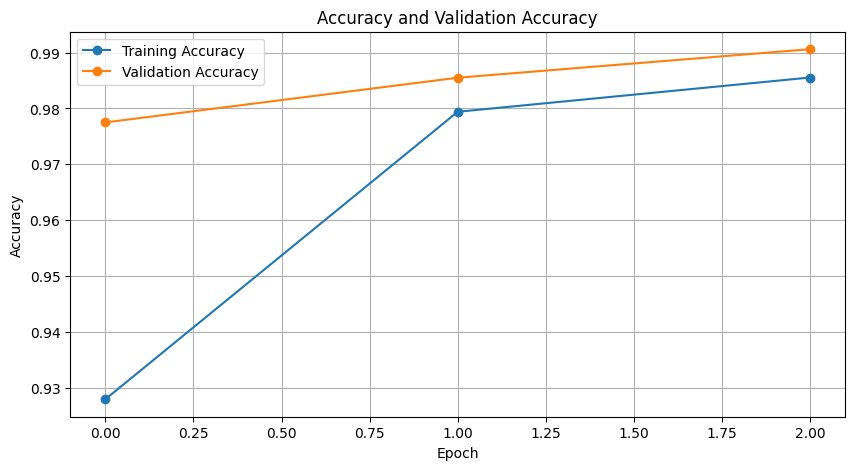

In [10]:
# Plot accuracy and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()